## Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/StwayneXG/gdsc-ceme-visionai.git

Cloning into 'gdsc-ceme-visionai'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 32 (delta 10), reused 27 (delta 8), pack-reused 0
Unpacking objects: 100% (32/32), 9.85 KiB | 1.23 MiB/s, done.


In [3]:
# Dataset Processing
from PIL import Image
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

# Machine Learning
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [30]:
import tensorflow as tf

## Define Constants

In [4]:
IMAGE_WIDTH=256
IMAGE_HEIGHT=256
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

ROOT_DIR = "/content/drive/MyDrive"
LABEL2INT ={"A": 0, "B": 1, "C": 2, "D": 3,
            "E": 4, "F": 5, "G": 6, "H": 7,
            "I": 8, "J": 9, "K": 10, "L": 11,
            "M": 12, "N": 13, "O": 14, "P": 15,
            "Q": 16, "R": 17, "S": 18, "T": 19,
            "U": 20, "V": 21, "W": 22, "X": 23,
            "Y": 24, "Z": 25}

In [5]:
!unzip "/content/drive/MyDrive/archive.zip"

Archive:  /content/drive/MyDrive/archive.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [6]:
sign_minst = pd.read_csv("/content/sign_mnist_train.csv")
sign_minst.tail(20)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27435,1,181,182,183,182,183,183,183,183,182,...,57,186,204,179,128,69,38,27,33,45
27436,19,170,170,170,170,170,170,170,170,170,...,222,216,217,216,215,214,212,212,208,174
27437,16,153,158,161,162,165,170,174,177,179,...,89,87,83,78,71,73,68,211,238,231
27438,21,121,123,126,127,129,131,131,132,133,...,70,52,13,127,151,143,143,143,140,137
27439,11,124,127,133,136,139,144,148,150,152,...,209,208,207,205,204,204,203,202,201,199
27440,5,174,177,179,181,183,184,185,188,193,...,221,222,222,221,220,220,220,220,220,220
27441,18,138,140,142,146,151,156,159,163,164,...,111,100,101,104,103,102,102,100,98,98
27442,0,181,182,181,181,181,180,180,180,180,...,189,188,188,186,185,184,182,182,182,180
27443,21,190,191,194,198,198,198,198,199,200,...,206,255,255,255,255,255,238,197,153,131
27444,18,148,151,154,159,162,165,168,170,172,...,107,203,212,213,213,213,213,213,214,212


In [7]:
image_matrix = np.array(sign_minst.iloc[27442][1:785]).reshape((28, 28))
image_matrix.shape

(28, 28)

In [9]:
cv2_imshow(image_matrix)

In [10]:
def convert_images_to_file(csv_file):
  for i in range(len(csv_file)):
    image_matrix = np.array(csv_file.iloc[i][1:785]).reshape((28, 28))
    cv2.imwrite(f'/content/drive/MyDrive/SLC_MNIST_DATA/{list(LABEL2INT.keys())[list(LABEL2INT.values()).index(csv_file.iloc[i][0])]}.{csv_file.iloc[i][0]}.png', image_matrix)

In [11]:
convert_images_to_file(sign_minst)

## Load Dataset
### 2.1 Extract filenames

In [12]:
filenames = os.listdir(f"{ROOT_DIR}/SLC_MNIST_DATA")

# filename format: [category].[id].jpg

categories = []
for filename in filenames:
    category = filename.split('.')[0]
    categories.append(LABEL2INT[category])

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [76]:
df.head()

,filename,category
0,D.3.png,3
1,G.6.png,6
2,C.2.png,2
3,N.13.png,13
4,Q.16.png,16


### 2.2 Convert filenames to images

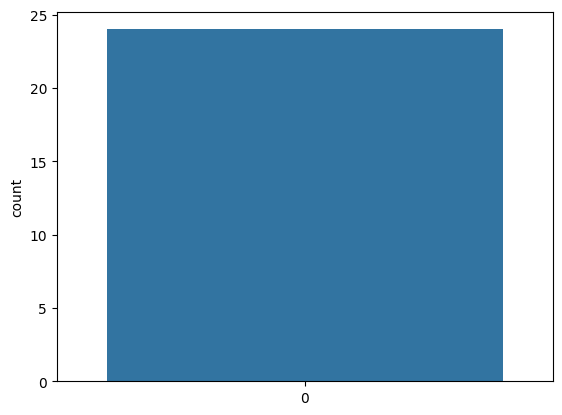

In [71]:
def filename_to_image(filename):
    img = Image.open(f"{ROOT_DIR}/SLC_MNIST_DATA/{filename}")
    img = img.resize(IMAGE_SIZE)
    return np.array(img)

train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)

X_train = train_df['filename'].apply(filename_to_image)
Y_train = train_df['category']

X_test = test_df['filename'].apply(filename_to_image)
Y_test = test_df['category']

g = sns.countplot(df['category'])

### 2.3 Label encoding

In [72]:
Y_train.shape, Y_test.shape

((19,), (5,))

In [74]:
Y_train

9     20
13    23
1      6
21     5
5      8
2      2
12    21
15     1
3     13
4     16
22     7
17    11
20     0
23    14
7     18
10    17
14    24
19     4
6     22
Name: category, dtype: int64

In [75]:
Y_test

8     10
16    12
0      3
18    15
11    19
Name: category, dtype: int64

In [78]:
# Encode labels to one hot vectors (ex : "B" -> 0 -> [0,1,0,0,0,0,
                                                    # 0,0,0,0,0,0,
                                                    # 0,0,0,0,0,0,
                                                    # 0,0,0,0,0,0,
                                                    # 0,0])
Y_train = to_categorical(Y_train, num_classes = 25)
Y_test = to_categorical(Y_test, num_classes = 25)

### 2.4 Example Sample

In [54]:
# Some examples
g = plt.imshow(X_train[:,:,:])

KeyError: ignored

## CNN
### 3.1 Define the model

In [79]:
# Set the CNN model 
# our CNN architechture is In -> [[Conv2D->relu] -> BatchNormalize -> MaxPool2D]*3 -> Flatten -> Dense -> BatchNormalize -> Out

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(25, activation='softmax'))

### 3.2 Set the Optimizer

In [80]:
# Compile the model
model.compile(optimizer = 'rmsprop', loss = "categorical_crossentropy", metrics=["accuracy"])

## Training

In [81]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((19,), (19, 25), (5,), (5, 25))

In [82]:
model.fit(X_train, Y_train, batch_size = 64, epochs = 10, validation_data = (X_test, Y_test))

ValueError: ignored

## Evaluation

# Advanced Concepts
## Preprocessing 
Histogram Equalization, Mean Normalization, Standard Deviation Normalization
## Augmentation
Rotating, Mirroring, Blurring, Noising
## Regularization
Handling Overfitting
## Model Designing
## Optimizers
## Finetuning Existing Models